## Loading libraries


In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os # to handle directory references

In [2]:
# Load the file for the Presidential state toplines
df = pd.read_csv("../data/clean_data/2020/presidential_state_toplines_2020.csv", encoding = 'utf-8')

In [3]:
# The first 5 rows of the file
df.head(5)

,cycle,modeldate,candidate_inc,candidate_chal,state,tipping,vpi,winstate_inc,winstate_chal,voteshare_inc,...,margin_hi,margin_lo,win_EC_if_win_state_inc,win_EC_if_win_state_chal,win_state_if_win_EC_inc,win_state_if_win_EC_chal,state_turnout,state_turnout_hi,state_turnout_lo,timestamp
0,2020,10/05/2020,Trump,Biden,Wyoming,0.000000,0.000000,0.998625,0.001375,68.59200,...,51.989000,28.18282,0.181800,0.963636,0.999725,0.001628,248682.0,289896.5,209278.5,5/10/2020 14:34
1,2020,10/05/2020,Trump,Biden,Wisconsin,0.133563,6.218521,0.177200,0.822800,46.53666,...,2.330732,-14.24209,0.796981,0.948226,0.777671,0.958477,3047938.0,3441382.0,2659453.0,5/10/2020 14:34
2,2020,10/05/2020,Trump,Biden,West Virginia,0.000150,0.032301,0.993350,0.006650,65.88024,...,47.157420,19.85341,0.182665,0.977444,0.999174,0.007985,685877.9,794993.5,581345.5,5/10/2020 14:34
3,2020,10/05/2020,Trump,Biden,Washington,0.001250,0.048835,0.007800,0.992200,36.58363,...,-13.420110,-35.97208,0.548077,0.816846,0.023541,0.995669,3578657.0,4062822.0,3105877.0,5/10/2020 14:34
4,2020,10/05/2020,Trump,Biden,Virginia,0.012525,0.423182,0.026500,0.973500,43.55361,...,-4.309885,-19.40033,0.929245,0.834283,0.135600,0.997758,4222231.0,4773274.0,3684266.0,5/10/2020 14:34


In [4]:
# Select the columns for the state, the date and the voteshare between Trump, Biden and other.
df = df[['modeldate','state','voteshare_inc', 'voteshare_chal', 'voteshare_other']]
df

,modeldate,state,voteshare_inc,voteshare_chal,voteshare_other
0,10/05/2020,Wyoming,68.59200,28.45008,2.957924
1,10/05/2020,Wisconsin,46.53666,52.51788,0.945465
2,10/05/2020,West Virginia,65.88024,32.33737,1.782385
3,10/05/2020,Washington,36.58363,61.30294,2.113433
4,10/05/2020,Virginia,43.55361,55.44437,1.002013
...,...,...,...,...,...
7107,6/01/2020,California,34.97393,63.09200,1.934068
7108,6/01/2020,Arkansas,60.87153,37.47324,1.655232
7109,6/01/2020,Arizona,48.75072,49.84497,1.404308
7110,6/01/2020,Alaska,54.42247,43.01599,2.561537


In [12]:
# Average of the data by date and state.
df_avg = df.groupby(['modeldate','state']).mean()
df_avg

voteshare_inc  voteshare_chal  voteshare_other
modeldate  state                                                        
10/01/2020 Alabama             58.48220        40.72155         0.796247
           Alaska              52.58267        45.17170         2.245623
           Arizona             48.04539        50.64658         1.308028
           Arkansas            56.32597        42.08474         1.589298
           California          34.02298        64.05972         1.917305
...                                 ...             ...              ...
9/30/2020  Virginia            44.04475        54.93501         1.020240
           Washington          37.17141        60.66965         2.158944
           West Virginia       66.00268        32.20667         1.790648
           Wisconsin           46.52716        52.51878         0.954052
           Wyoming             68.34772        28.35223         3.300052

[7112 rows x 3 columns]

In [24]:
# Then i finally decided to group the data by state and used the average percentage of vote share.
df1 = df.groupby(['state']).mean()
df1

,voteshare_inc,voteshare_chal,voteshare_other
state,,,
Alabama,59.557721,39.648648,0.793631
Alaska,53.476999,44.186375,2.336626
Arizona,48.386509,50.264777,1.348714
Arkansas,56.784881,41.585218,1.629902
California,34.492683,63.581291,1.926026
Colorado,44.238472,53.869081,1.892447
Connecticut,39.949516,59.120377,0.930107
Delaware,37.987829,60.855039,1.157133
District of Columbia,5.912331,90.560841,3.526828


In [25]:
# Filtering the states, drop the duplicates
df1 = df1.drop(['ME-1', 'ME-2', 'NE-1', 'NE-2', 'NE-3'], axis=0)
df1

,voteshare_inc,voteshare_chal,voteshare_other
state,,,
Alabama,59.557721,39.648648,0.793631
Alaska,53.476999,44.186375,2.336626
Arizona,48.386509,50.264777,1.348714
Arkansas,56.784881,41.585218,1.629902
California,34.492683,63.581291,1.926026
Colorado,44.238472,53.869081,1.892447
Connecticut,39.949516,59.120377,0.930107
Delaware,37.987829,60.855039,1.157133
District of Columbia,5.912331,90.560841,3.526828


In [26]:
# Sort the data in descending order to find a forecast of the top 10 states who are in favor of Trump winning the election.
df2=df1.sort_values(by=['voteshare_inc'], ascending=False)
df2 = df2.head(10)

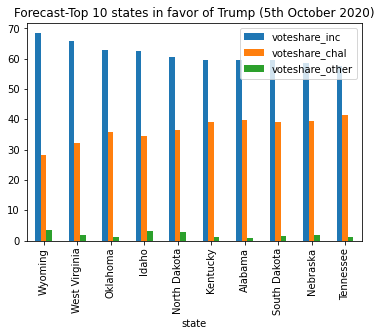

In [27]:
#Plot a bar graph for the top 10 states in favor of Trump.
df2.plot(kind = 'bar', title = 'Forecast-Top 10 states in favor of Trump (5th October 2020)')

In [28]:
# Sort the data in descending order to find a forecast of the top 10 states who are in favor of Biden winning the election.
df3=df1.sort_values(by=['voteshare_chal'], ascending=False)
df3 = df3.head(10)

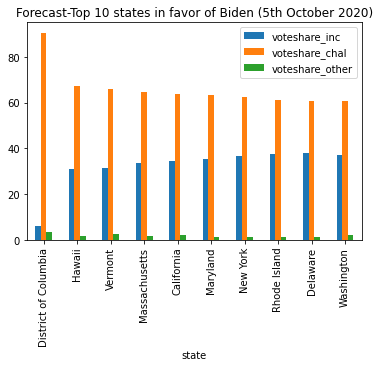

In [29]:
#Plot a bar graph for the top 10 states in favor of Biden.
df3.plot(kind = 'bar',title = 'Forecast-Top 10 states in favor of Biden (5th October 2020)')